Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Question 1 (25%)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

C:\Users\gxy\AppData\Local\Temp\ipykernel_6892\1362634970.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


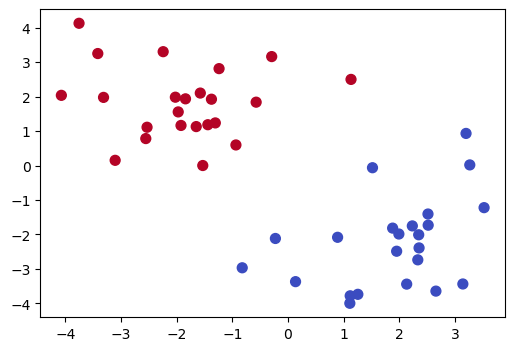

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

### a. Report the separating hyperplane (line) (5%).

In [3]:
# your code here

In [4]:
# Fit the model.  Using a linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear',C=100000)  
clf.fit(X, Y)

SVC(C=100000, kernel='linear')

After fitting the model, we can use the trained SVM to predict classes for new data points, or to evaluate the model's performance on a test set, if you have one. The SVM will have determined the optimal hyperplane that separates the classes in your training dataset, characterized by its weights (accessible via clf.coef_) and intercept (accessible via clf.intercept_).

In [5]:
w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-2.5, 2.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

print('The separating hyperplane is the line: y = {a}x - {b}'.format(a=a, b=(clf.intercept_[0]) / w[1]))

The separating hyperplane is the line: y = 0.9386576482271843x - 0.025837774172388386


### b. List the support vectors (5%).

In [6]:
# your code here

In [7]:
# Fit the model using a linear SVM
from sklearn import svm
clf = svm.SVC(kernel='linear', C=100000)
clf.fit(X, Y)

# Listing the support vectors
support_vectors = clf.support_vectors_
print(support_vectors)

[[ 1.5180363e+00 -6.3993825e-02]
 [ 1.1323244e+00  2.5000131e+00]
 [-1.5313310e+00  1.2000000e-05]]


### c. Calculate and report the upper and lower hyperplanes (lines) of the margin (5%).

In [8]:
# your code here

In [9]:
# Using support vectors to calculate the offsets for the margin boundaries
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])

b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])


# Defining the equations for the upper and lower hyperplanes
print('The lower separating hyperplane is the line: y = {a}x - {b}'.format(a = a, b = abs(b[1] - a * b[0])))
print('The upper separating hyperplane is the line: y = {a}x + {b}'.format(a = a, b = (b[1] - a * b[0])))

The lower separating hyperplane is the line: y = 0.9386576482271843x - 1.4374075551173824
The upper separating hyperplane is the line: y = 0.9386576482271843x + 1.4374075551173824


### d. Compute and report the width of the margin (5%). 

#### Optional: you can also add a plot showing all points, the separating hyperplane that passes through the support vectors for 5% extra credit.

In [10]:
# your code here

In [11]:
margin_width = 2 / np.linalg.norm(w)

print(f'The width of the margin is: {margin_width}')

The width of the margin is: 2.133624894940584


In [12]:
# optional plot here

C:\Users\gxy\AppData\Local\Temp\ipykernel_6892\930114421.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


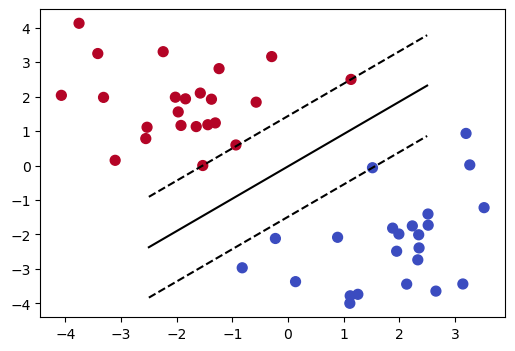

In [13]:
plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))

plt.axis('tight')
plt.show()

### e. What would you expect to happen to the margin if the constant C was made very small? (5%)

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

In [14]:
clf = svm.SVC(kernel='linear',C=0.000000001)  
clf.fit(X, Y)
w = clf.coef_[0]
margin_width = 2 / np.linalg.norm(w)
print(f'The width of the margin is: {margin_width}')

The width of the margin is: 15729265.121424304


There is greater misclassification and a wider margin when the C value is less. This occurs as a result of a smaller C emphasizing margin maximization as a punishment for incorrectly identifying training instances.

## Question 2 (25%)

### Given the dataset provided below, answer the following questions:

C:\Users\gxy\AppData\Local\Temp\ipykernel_6892\1785234660.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


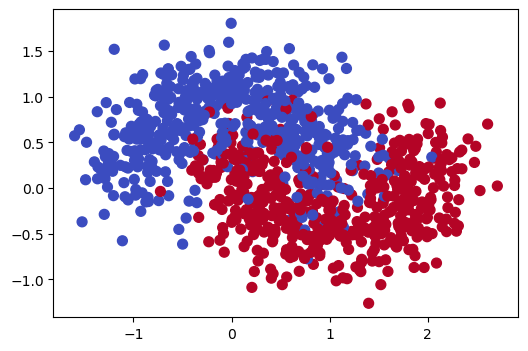

In [15]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy (4%).

In [16]:
# your code here

In [17]:
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)

print("In sample, we successfully predict {} percent of the data".format((Y_train==clf.predict(X_train)).sum()*100/len(Y_train)))
print("Out of sample, we successfully predict {} percent of the data".format((Y_test==clf.predict(X_test)).sum()*100/len(Y_test)))

In sample, we successfully predict 84.92537313432835 percent of the data
Out of sample, we successfully predict 85.15151515151516 percent of the data


### Next we will use the validation subset (part of the training set) in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree. (8%)


In [18]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here

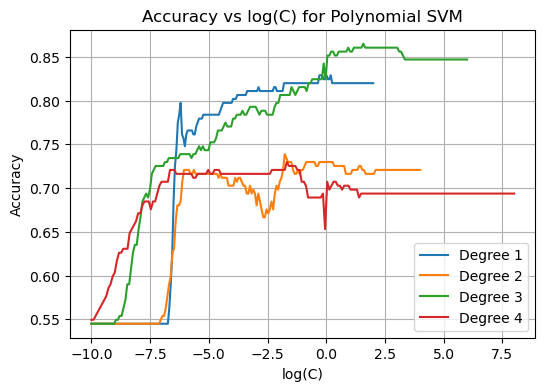

In [19]:
from math import exp
from sklearn.metrics import accuracy_score
for degree in [1, 2, 3, 4]:
    C_values = [exp(i) for i in np.linspace(-10, 2*degree, 200)]
    accuracies = []

    for C in C_values:
        # Train the SVM model
        clf = svm.SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train_1, Y_train_1)

        # Predict the labels on validation dataset
        Y_pred = clf.predict(X_vali)

        # Calculate accuracy
        accuracy = accuracy_score(Y_vali, Y_pred)
        accuracies.append(accuracy)
    
    # Plotting the accuracy vs log(C)
    plt.plot(np.log(C_values), accuracies, label=f'Degree {degree}')

# Finalize the plot
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs log(C) for Polynomial SVM')
plt.legend()
plt.grid(True)
plt.show()

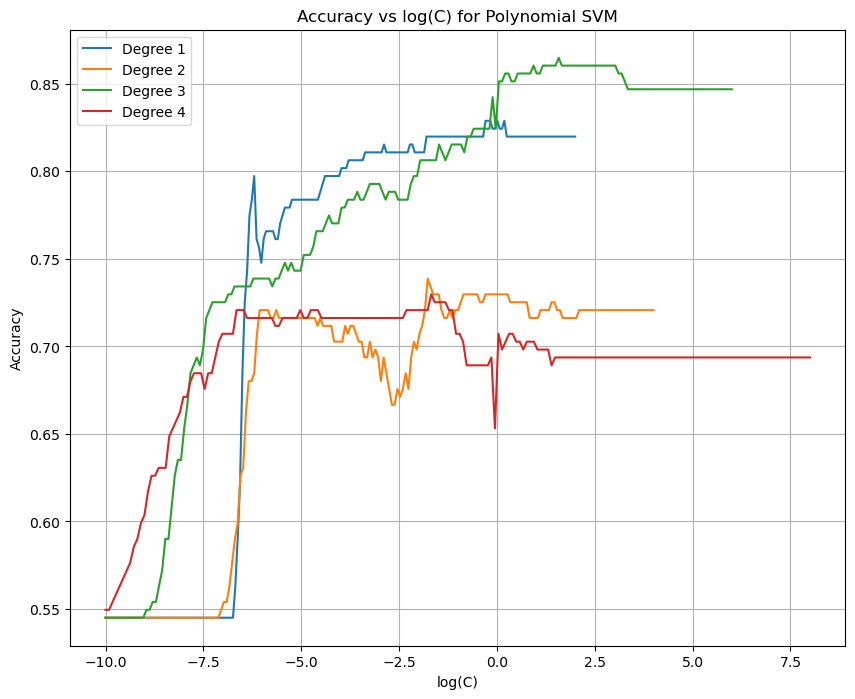

In [20]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log


# Prepare to plot
plt.figure(figsize=(10, 8))

# Iterate over polynomial degrees
for degree in [1, 2, 3, 4]:
    # Generate C values
    C_values = [exp(i) for i in np.linspace(-10, 2 * degree, 200)]
    accuracies = []

    # Train and evaluate models
    for C in C_values:
        clf = svm.SVC(kernel='poly', degree=degree, C=C)
        clf.fit(X_train_1, Y_train_1)
        
     # Predict the labels on validation dataset
        Y_pred = clf.predict(X_vali)

        # Calculate accuracy
        accuracy = accuracy_score(Y_vali, Y_pred)
        accuracies.append(accuracy)
    
    # Plotting
    plt.plot([log(c) for c in C_values], accuracies, label=f'Degree {degree}')

# Finalize the plot
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs log(C) for Polynomial SVM')
plt.legend()
plt.grid(True)
plt.show()

### c. Explain how each of these selected parameters can impact the performance of the model. Provide insights into the consequences of choosing different values for these parameters, particularly in terms of overfitting, accuracy, generalization, and other (5%).

Your answer here. You can justify your intuitions with examples if you want.

The decision boundary's degree of flexibility is determined by the polynomial kernel function. More closely fitting the training data with a polynomial of greater degree can result in improved accuracy on the training set, but it can also lead to overfitting. When adding complexity (degree) to the graph above does not always result in improved validation performance, it may be an indication of overfitting.

The trade-off between decreasing the classification error and maximizing the margin is managed by parameter C. The accuracy is often poorer in the graph for smaller values of log(C), which correlate to smaller values of C. This indicates underfitting. Accuracy rises as log(C) increases, but eventually reaches a plateau or even falls, indicating that the model may begin to overfit.

According to the plot, there appears to be a range of C values for each degree that maximize accuracy prior to either overfitting or underfitting. The degree of the polynomial appears to affect the ideal log(C) value, while the degree of the polynomial itself is influenced by the intrinsic complexity of the data.

### d. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected (8%). 

In [21]:
# your code here

In [22]:
clf = svm.SVC(kernel='poly',C = np.exp(2.5),degree=3) 
clf.fit(X_train, Y_train)

print("In sample, we successfully predict {} percent of the data".format((Y_train==clf.predict(X_train)).sum()*100/len(Y_train)))
print("Out of sample, we successfully predict {} percent of the data".format((Y_test==clf.predict(X_test)).sum()*100/len(Y_test)))

In sample, we successfully predict 85.97014925373135 percent of the data
Out of sample, we successfully predict 87.57575757575758 percent of the data


## Question 3 (10%)

### This task is to be done with manual calculations rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

### Questions (just add responses below, and show how you got this result):

#### a. Calculate and repor the following sample probabilities (5%):

P(Yes)= 6/11

P(No)= 5/11

P(Red|Yes)= 5/6

P(SUV|Yes)= 2/6

P(Domestic|Yes)= 3/6

P(Red|No)= 2/5

P(SUV|No)= 3/5

P(Domestic|No)= 3/5

#### b. Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work (5%).

Your answer here.

In [23]:
# Naive Bayes Classifier probabilities from the user's input
P_Yes = 6/11
P_No = 5/11

P_Red_Yes = 5/6
P_SUV_Yes = 2/6
P_Domestic_Yes = 3/6

P_Red_No = 2/5
P_SUV_No = 3/5
P_Domestic_No = 3/5

# Probability that a red, domestic SUV will be stolen (Yes)
# Using the Naive Bayes formula: P(A|B) = P(B|A) * P(A) / P(B)
# However, we don't have P(B), but we can calculate both P(B|A)*P(A) and P(B|~A)*P(~A) and then normalize them to get the proper probability.

# P(Stolen|Red,Domestic,SUV) = P(Red|Stolen) * P(Domestic|Stolen) * P(SUV|Stolen) * P(Stolen)
P_Stolen_given_Red_Domestic_SUV = P_Red_Yes * P_Domestic_Yes * P_SUV_Yes * P_Yes

# P(Not Stolen|Red,Domestic,SUV) = P(Red|Not Stolen) * P(Domestic|Not Stolen) * P(SUV|Not Stolen) * P(Not Stolen)
P_Not_Stolen_given_Red_Domestic_SUV = P_Red_No * P_Domestic_No * P_SUV_No * P_No

# Now we normalize these probabilities so they sum to 1
P_Stolen_given_Red_Domestic_SUV_normalized = P_Stolen_given_Red_Domestic_SUV / (P_Stolen_given_Red_Domestic_SUV + P_Not_Stolen_given_Red_Domestic_SUV)

P_Stolen_given_Red_Domestic_SUV_normalized

0.536480686695279

The probability that a red, domestic SUV will be stolen is 0.536480686695279.

## Question 4 (15%)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [24]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre  glu  blood_p  triceps  serum   b_m  pedigree_f  age
0      3  158       64       13    387  31.2       0.295   24
1      0   84       64       22     66  35.8       0.545   21
2      9  120       72       22     56  20.8       0.733   48
3      4  110       76       20    100  28.4       0.118   27
4      2  100       66       20     90  32.9       0.867   28


### a. What is the prediction accuracy for Naive Bayes, both in-sample (on the training data) and out-of-sample (on the test data)? (3%)

In [25]:
# your code here

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Measure accuracy
in_sample_accuracy = (y_train == gnb.predict(X_train)).sum() * 100 / len(y_train)
out_of_sample_accuracy = (y_test == gnb.predict(X_test)).sum() * 100 / len(y_test)

(in_sample_accuracy, out_of_sample_accuracy)

(74.15254237288136, 70.25316455696202)

### b. What is the prior probability of diabetes, learned from the training data? (3%)

In [28]:
# your code here

In [29]:
pp = len(data_train.loc[data_train['y'] ==1.0])*1.0 / len(data_train) *1.0
pp

0.326271186440678

The prior probability of diabetes, learned from the training data, is 0.326271186440678.

### c. What is the mean and variance of each input variable for patients with diabetes? (3%)

In [30]:
# your code here

In [31]:
with_diabetes = data_train.loc[data_train['y'] ==1]

for i in with_diabetes.columns[2:]:
    print('For input variable {i}, mean is {m}, variance is {var}'.format(i = i, 
                                                                             m = with_diabetes[i].mean(), 
                                                                             var = with_diabetes[i].var()))

For input variable t_pre, mean is 4.0, variance is 12.763157894736842
For input variable glu, mean is 142.06493506493507, variance is 977.4299384825703
For input variable blood_p, mean is 74.3896103896104, variance is 181.2672590567327
For input variable triceps, mean is 33.16883116883117, variance is 109.1684894053315
For input variable serum, mean is 200.2207792207792, variance is 16018.542720437461
For input variable b_m, mean is 34.89090909090909, variance is 40.05215311004784
For input variable pedigree_f, mean is 0.6141948051948053, variance is 0.18767131681476418
For input variable age, mean is 35.44155844155844, variance is 110.9340396445659


### d. What is the mean and variance of each input variable for patients without diabetes? (3%)

In [32]:
# your code here

In [33]:
no_diabetes = data_train.loc[data_train['y'] ==0.0]
for i in no_diabetes.columns[2:]:
    print('For input variable {i}, mean is {m}, variance is {var}'.format(i = i, 
                                                                             m = no_diabetes[i].mean(), 
                                                                             var = no_diabetes[i].var()))

For input variable t_pre, mean is 2.6729559748427674, variance is 6.436669055011541
For input variable glu, mean is 111.23899371069183, variance is 601.6640394873018
For input variable blood_p, mean is 69.0880503144654, variance is 139.37194490884482
For input variable triceps, mean is 27.11320754716981, variance is 103.1263434439933
For input variable serum, mean is 128.25786163522014, variance is 8542.065997930109
For input variable b_m, mean is 31.737735849056605, variance is 40.3951492715548
For input variable pedigree_f, mean is 0.47428930817610065, variance is 0.08616858665711329
For input variable age, mean is 28.28301886792453, variance is 69.31812753761639


### e. What are some potential steps you may want to use to improve the prediction accuracy? (3%)

Your answer here. You can justify your answer with code if you'd like, but this is not required.

Feature Selection: Choose relevant features and discard those that do not contribute to the predictive power of the model. Irrelevant features can introduce noise and reduce accuracy.
Scaling and Transformation: For Gaussian Naïve Bayes, ensure features are normally distributed since the model assumes all continuous features are sampled from a Gaussian distribution.

Feature Engineering:

Feature Selection: Reduce noise by selecting only those features that are most predictive of the outcome. This can be done using techniques like mutual information, ANOVA, or even model-based methods.
Feature Transformation: Apply transformations like normalization, scaling, or PCA (Principal Component Analysis) to make the data more suitable for the mode

Data Quality:

Handling Missing Data: Impute missing values using methods such as mean or median imputation, or more sophisticated approaches like k-Nearest Neighbors (k-NN) imputation.
Removing Outliers: Identify and remove outliers that may skew the data and negatively impact the model's performance.

Data Augmentation:

Increasing the size of the dataset through techniques that introduce variability, such as slight modifications of the existing data, can help improve the model's robustness and accuracy.(from chatgpt)

## Question 5 (25%)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [34]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  6  2
2  2  6  2
3  6  2  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  6
8  5  1  1
0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
Name: y, dtype: int64


### a. Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy (10%).

In [35]:
# your code here

In [36]:
# Training a binary Naive Bayes Classifier with discrete input attributes.
# Assume that the binary output variable takes on values 0 or 1. 
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [37]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

In sample prediction accuracy: 0.8888888888888888
Out of sample prediction accuracy: 0.6388888888888888


### b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [38]:
# your code here

In [39]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [40]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=50)

y_pred_train = testNaiveBayesDiscrete(X_Labeled_train,naive_bayes_classifier)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

# measure accuracy for the binary prediction task
print('In sample prediction accuracy:',1.0*sum((y_pred_train>0.5)==y_Labeled_train)/len(y_Labeled_train))
print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 50
Iteration 2 of 50
Iteration 3 of 50
Iteration 4 of 50
Iteration 5 of 50
Iteration 6 of 50
Iteration 7 of 50
Iteration 8 of 50
Iteration 9 of 50
Iteration 10 of 50
Iteration 11 of 50
Iteration 12 of 50
Iteration 13 of 50
Iteration 14 of 50
Iteration 15 of 50
Iteration 16 of 50
Iteration 17 of 50
Iteration 18 of 50
Iteration 19 of 50
Iteration 20 of 50
Iteration 21 of 50
Iteration 22 of 50
Iteration 23 of 50
Iteration 24 of 50
Iteration 25 of 50
Iteration 26 of 50
Iteration 27 of 50
Iteration 28 of 50
Iteration 29 of 50
Iteration 30 of 50
Iteration 31 of 50
Iteration 32 of 50
Iteration 33 of 50
Iteration 34 of 50
Iteration 35 of 50
Iteration 36 of 50
Iteration 37 of 50
Iteration 38 of 50
Iteration 39 of 50
Iteration 40 of 50
Iteration 41 of 50
Iteration 42 of 50
Iteration 43 of 50
Iteration 44 of 50
Iteration 45 of 50
Iteration 46 of 50
Iteration 47 of 50
Iteration 48 of 50
Iteration 49 of 50
Iteration 50 of 50
In sample prediction accuracy: 0.6666666666666666
Out of sa